In [40]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense

In [41]:
data = pd.read_csv('./titanic_dataset.csv')
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare','Embarked'], axis=1, inplace=True)
data.dropna(inplace=True)
# convert age to closest int

data['Age'] = (data['Age']).astype(int)
#normalize age
data['Age'] = (data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())
#normalize sibsp
data['SibSp'] = (data['SibSp']-data['SibSp'].min())/(data['SibSp'].max()-data['SibSp'].min())
#normalize parch
data['Parch'] = (data['Parch']-data['Parch'].min())/(data['Parch'].max()-data['Parch'].min())
#normalize pclass
data['Pclass'] = (data['Pclass']-data['Pclass'].min())/(data['Pclass'].max()-data['Pclass'].min())



# change sex to 0 or 1
# add new column of 0s
data = data.assign(SexNum=0)

for row, col in data.iterrows():
    if(data.at[row,'Sex']=='male'):
        data.at[row,'SexNum']=1

#drop sex column
data.drop(['Sex'], axis=1, inplace=True) 
data.describe()


,Survived,Pclass,Age,SibSp,Parch,SexNum
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,0.618347,0.370991,0.102521,0.071895,0.634454
std,0.491460,0.419125,0.181706,0.185957,0.142215,0.481921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,0.350000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.475000,0.200000,0.166667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X = data.drop('Survived', axis=1)
Y = np.array(data['Survived']) 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
Y_train = np.array(Y_train).astype('float32')
Y_test = np.array(Y_test).astype('float32')







In [55]:
model = Sequential()

model.add(Dense(16,input_shape=(5,), activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(Dense(8, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(Dense(1, activation='sigmoid'))


model.compile( loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                96        
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(X_train, Y_train, epochs=1500, batch_size=X_train.shape[0],
                          validation_data=(X_test,Y_test), verbose=0)

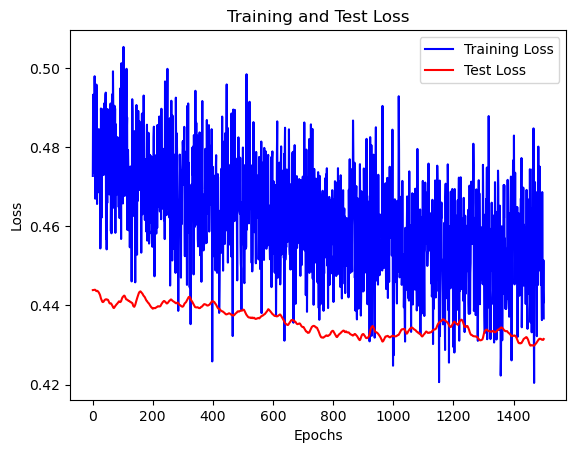

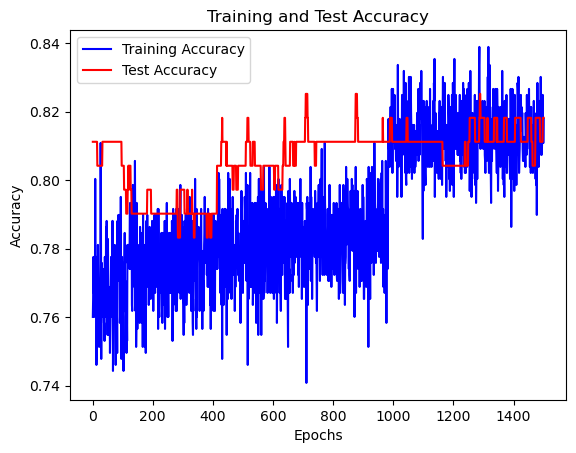

In [60]:
# Get the training and test loss from the model history
train_loss = history.history['loss'] 
test_loss = history.history['val_loss'] 

# Plot the training and test loss 
epochs = range(1, len(train_loss) + 1) 
plt.plot(epochs, train_loss, 'b', label='Training Loss') 
plt.plot(epochs, test_loss, 'r', label='Test Loss') 
plt.title('Training and Test Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

# Get the training and test accuracy from the model history
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Plot the training and test accuracy
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, test_acc, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

